Basics of Probability


1. Write a Python program to simulate the following scenarios:  
  a. Tossing a coin 10,000 times and calculating the experimental probability of heads and tails.  
  b. Rolling two dice and computing the probability of getting a sum of 7.  
  Steps  
      a. Use Python's random module for simulations.  
      b. Implement loops for repeated trials.  
      c. Track outcomes and compute probabilities.  



In [14]:
import random

#tossing a coin
trials=10000
head=0
tail=0

for i in range(trials):
    if random.choice(['H','T'])=='H':
        head+=1
    else:
        tail +=1

print("Heads Probability:", head / trials)
print("Tails Probability:", tail / trials)

#Rolling a dice

count=0
trail2=5000

for i in range(trail2):
    d1=random.randint(1,6)
    d2=random.randint(1,6)

    if d1+d2==7:
        count +=1
print("Probablility of getting sum 7 : " ,count/trail2)

Heads Probability: 0.5004
Tails Probability: 0.4996
Probablility of getting sum 7 :  0.1642



2. Write a function to estimate the probability of getting at least one "6" in 10 rolls of a fair die.  
  Steps  
      a. Simulate rolling a die 10 times using a loop.  
      b. Track trials where at least one "6" occurs.  
      c. Calculate the proportion of successful trials.


In [15]:
import random
def prob_atleast_six():
    success=0
    for _ in range(10):
            if random.randint(1, 6) == 6:
                found = True
                break
    if found:
         success+=1
    return success/trials
print("Probability:", prob_atleast_six())


Probability: 0.0001


Conditional Probability and Bayes' Theorem


3. A bag contains 5 red, 7 green, and 8 blue balls. A ball is drawn randomly, its color noted, and it is put back into the bag. If this process is repeated 1000 times, write a Python program to estimate:  
  a. The probability of drawing a red ball given that the previous ball was blue.  
  b. Verify Bayes' theorem with the simulation results.  


Steps  
    a. Use random sampling to simulate the process.  
    b. Compute conditional probabilities directly from the data. 


In [16]:
import numpy as np

# Set seed for reproducibility
np.random.seed(42)

# Ball counts
colors = ['R', 'G', 'B']
counts = [5, 7, 8]
total = sum(counts)
probs = [c/total for c in counts]

# Simulate 1000 draws with replacement
n_trials = 1000
draws = np.random.choice(colors, size=n_trials, p=probs)

# Count transitions
prev_blue = 0
blue_then_red = 0

for i in range(1, n_trials):
    if draws[i-1] == 'B':
        prev_blue += 1
        if draws[i] == 'R':
            blue_then_red += 1

# Conditional probability P(R | previous B)
p_r_given_b = blue_then_red / prev_blue

# Theoretical probabilities
p_r = 5/20
p_b = 8/20
p_r_and_b = p_r * p_b  # independent events

# Bayes theorem verification
p_r_given_b_theory = p_r

print("Simulation Results")
print("--------------------")
print("P(R | previous B) ≈", p_r_given_b)

print("\nTheoretical Results")
print("--------------------")
print("P(R) =", p_r)
print("P(B) =", p_b)
print("P(R ∩ B) =", p_r_and_b)
print("P(R | B) using Bayes =", p_r_given_b_theory)


Simulation Results
--------------------
P(R | previous B) ≈ 0.26098191214470284

Theoretical Results
--------------------
P(R) = 0.25
P(B) = 0.4
P(R ∩ B) = 0.1
P(R | B) using Bayes = 0.25


Random Variables and Discrete Probability


4. Generate a sample of size 1000 from a discrete random variable with the following distribution:  
  - P(X=1) = 0.25  
  - P(X=2) = 0.35  
  - P(X=3) = 0.4  
  Compute the empirical mean, variance, and standard deviation of the sample.  
  Steps  
      a. Use numpy.random.choice() to generate the sample.  
      b. Use numpy methods to calculate mean, variance, and standard deviation.




In [17]:
import numpy as np

# Given values and probabilities
values = [1, 2, 3]
probabilities = [0.25, 0.35, 0.4]

# Generate sample of size 1000
sample = np.random.choice(values, size=1000, p=probabilities)

# Compute statistics
mean = np.mean(sample)
variance = np.var(sample)
std_deviation = np.std(sample)

# Display results
print("Sample Mean:", mean)
print("Sample Variance:", variance)
print("Sample Standard Deviation:", std_deviation)


Sample Mean: 2.172
Sample Variance: 0.6584159999999999
Sample Standard Deviation: 0.811428370221303


Continuous Random Variables


5. Simulate 2000 random samples from an exponential distribution with a mean of 5. Visualize the distribution using:  
  a. A histogram.  
  b. A probability density function (PDF) overlay.  
  Steps  
      a. Use numpy.random.exponential().  
      b. Use matplotlib to create visualizations.  


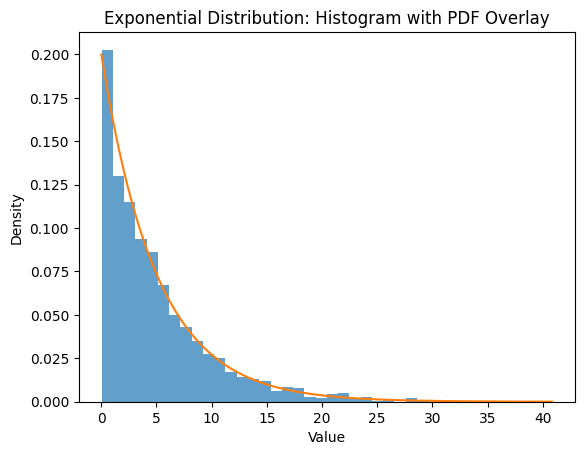

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

# Parameters
mean = 5
sample_size = 2000

# Generate samples from exponential distribution
samples = np.random.exponential(scale=mean, size=sample_size)

# Plot histogram
plt.figure()
plt.hist(samples, bins=40, density=True, alpha=0.7)

# Generate x values for PDF
x = np.linspace(0, samples.max(), 500)
pdf = (1/mean) * np.exp(-x/mean)

# Plot PDF overlay
plt.plot(x, pdf)

# Labels and title
plt.xlabel("Value")
plt.ylabel("Density")
plt.title("Exponential Distribution: Histogram with PDF Overlay")

plt.show()


Central Limit Theorem


6. Simulate the Central Limit Theorem by following these steps  
  a. Generate 10,000 random numbers from a uniform distribution.  
  b. Draw 1000 samples of size n = 30.  
  c. Calculate and visualize the distribution of sample means.  
  Steps  
      a. Use numpy.random.uniform().  
      b. Plot both the uniform distribution and the sample mean distribution for comparison.
 


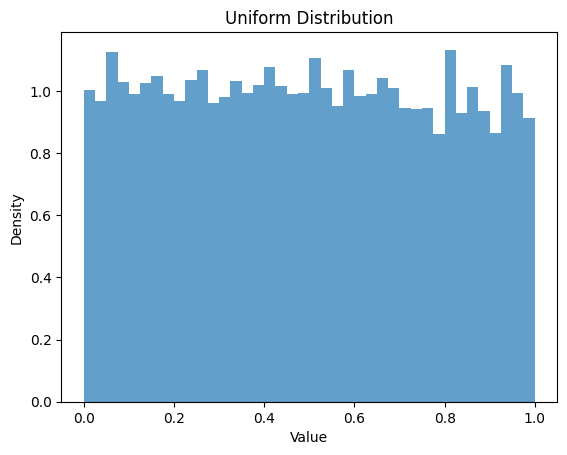

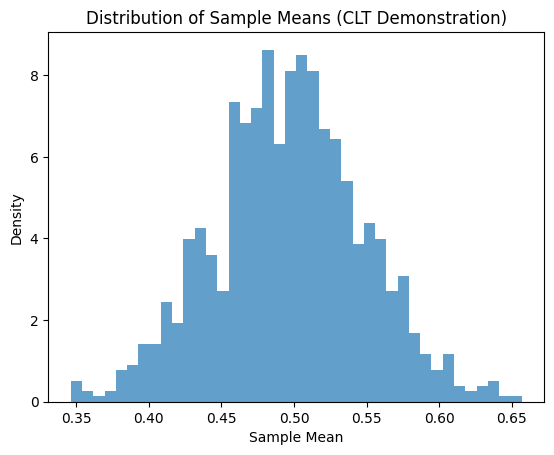

In [19]:
import numpy as np
import matplotlib.pyplot as plt

# Set seed for reproducibility
np.random.seed(42)

# Step a: Generate 10,000 random numbers from uniform distribution
population = np.random.uniform(0, 1, 10000)

# Step b: Draw 1000 samples of size n = 30
n = 30
num_samples = 1000
sample_means = [np.mean(np.random.choice(population, n)) for _ in range(num_samples)]

# Plot uniform distribution
plt.figure()
plt.hist(population, bins=40, density=True, alpha=0.7)
plt.title("Uniform Distribution")
plt.xlabel("Value")
plt.ylabel("Density")
plt.show()

# Plot distribution of sample means
plt.figure()
plt.hist(sample_means, bins=40, density=True, alpha=0.7)
plt.title("Distribution of Sample Means (CLT Demonstration)")
plt.xlabel("Sample Mean")
plt.ylabel("Density")
plt.show()
